# SMC

In [38]:
from experiments_utils import run_maybe_remotely
from sbi_ebm.sbibm.sbi_ebm import run as run_unle
for ns in (
    (1000,),
    (10000,),
    (100000,),
):
    for no in list(range(1, 5)):
        for num_smc_steps in (20, 5):
            for task in ("slcp", "two_moons", "gaussian_linear_uniform", "lotka_volterra"):
                _ = run_maybe_remotely(
                    run_unle,
                    folder_name="iclr_appendix",
                    experience_name="smc_vs_mala",
                    use_slurm=True,
                    slurm_kwargs={
                        "exclude": "gpu-350-01,gpu-350-02,gpu-350-03,gpu-350-04,gpu-350-05,gpu-380-10,gpu-380-11,gpu-380-12,gpu-380-13,gpu-380-14",
                    },
                    # "two_moons", (1000,), 1,
                    task=task,
                    num_samples=ns,
                    num_observation=no,
                    num_smc_steps=num_smc_steps,
                    num_mala_steps=3,
                    use_warm_start=True,
                    learning_rate=0.01,
                    max_iter=2000,
                    weight_decay=0.1,
                    random_seed=40,
                    sampler="smc",
                    num_particles=1000,
                    batch_size=1000,
                    restart_every=None,
                    num_posterior_samples=10000,
                    use_nuts=False,
                    init_proposal="prior",
                    # init_proposal="prior",
                    noise_injection_val=0.0005,
                    proposal="prior+noise",
                    # proposal="data",
                    inference_sampler="smc",
                    ebm_model_type="joint_tilted",
                    select_based_on_test_loss=False,
                    inference_proposal="prior",
                    use_data_from_past_rounds=False,
                    evaluate_posterior=True
            )

Submitted batch job 2519836
Submitted batch job 2519837
Submitted batch job 2519838
Submitted batch job 2519839
Submitted batch job 2519840
Submitted batch job 2519841
Submitted batch job 2519842
Submitted batch job 2519843
Submitted batch job 2519844
Submitted batch job 2519845
Submitted batch job 2519846
Submitted batch job 2519847
Submitted batch job 2519848
Submitted batch job 2519849
Submitted batch job 2519850
Submitted batch job 2519851
Submitted batch job 2519852
Submitted batch job 2519853
Submitted batch job 2519854
Submitted batch job 2519855
Submitted batch job 2519856
Submitted batch job 2519857
Submitted batch job 2519858
Submitted batch job 2519859
Submitted batch job 2519860
Submitted batch job 2519861
Submitted batch job 2519862
Submitted batch job 2519863
Submitted batch job 2519864
Submitted batch job 2519865
Submitted batch job 2519866
Submitted batch job 2519867
Submitted batch job 2519868
Submitted batch job 2519869
Submitted batch job 2519870
Submitted batch job 

# MALA

In [140]:
from experiments_utils import run_maybe_remotely
from sbi_ebm.sbibm.sbi_ebm import run as run_unle
for ns in (
    (1000,),
    (10000,),
    (100000,),
):
    for no in list(range(1, 5)):
        for task in ("slcp", "two_moons", "gaussian_linear_uniform", "lotka_volterra"):
            for num_mala_steps in (30,):
                _ = run_maybe_remotely(
                    run_unle,
                    folder_name="iclr_appendix",
                    experience_name="smc_vs_mala",
                    use_slurm=True,
                    slurm_kwargs={
                        "exclude": "gpu-350-01,gpu-350-02,gpu-350-03,gpu-350-04,gpu-350-05,gpu-380-10,gpu-380-11,gpu-380-12,gpu-380-13,gpu-380-14",
                    },
                    # "two_moons", (1000,), 1,
                    task=task,
                    num_samples=ns,
                    num_observation=no,
                    num_smc_steps=3,
                    num_mala_steps=num_mala_steps,
                    use_warm_start=True,
                    learning_rate=0.01,
                    max_iter=2000,
                    weight_decay=0.1,
                    random_seed=40,
                    sampler="mala",
                    num_particles=1000,
                    batch_size=1000,
                    restart_every=None,
                    num_posterior_samples=10000,
                    use_nuts=False,
                    init_proposal="prior",
                    # init_proposal="prior",
                    noise_injection_val=0.0005,
                    proposal="prior+noise",
                    # proposal="data",
                    inference_sampler="smc",
                    ebm_model_type="joint_tilted",
                    select_based_on_test_loss=False,
                    inference_proposal="prior",
                    use_data_from_past_rounds=False,
                    evaluate_posterior=True,
                    training_num_frozen_steps=20,
            )

Submitted batch job 2519983
Submitted batch job 2519984
Submitted batch job 2519985
Submitted batch job 2519986
Submitted batch job 2519987
Submitted batch job 2519988
Submitted batch job 2519989
Submitted batch job 2519990
Submitted batch job 2519991
Submitted batch job 2519992
Submitted batch job 2519993
Submitted batch job 2519994
Submitted batch job 2519995
Submitted batch job 2519996
Submitted batch job 2519997
Submitted batch job 2519998
Submitted batch job 2519999
Submitted batch job 2520000
Submitted batch job 2520001
Submitted batch job 2520002
Submitted batch job 2520003
Submitted batch job 2520004
Submitted batch job 2520005
Submitted batch job 2520006
Submitted batch job 2520007
Submitted batch job 2520008
Submitted batch job 2520009
Submitted batch job 2520010
Submitted batch job 2520011
Submitted batch job 2520012
Submitted batch job 2520013
Submitted batch job 2520014
Submitted batch job 2520015
Submitted batch job 2520016
Submitted batch job 2520017
Submitted batch job 

In [1]:
import pandas as pd

In [2]:
from experiments_utils.fetching import ResultsManager
r = ResultsManager("iclr_appendix")

In [3]:
results_df = r.fetch_evaluation_results()

  PyTreeDef = type(jax.tree_structure(None))
INFO:absl:Unable to initialize backend 'tpu_driver': NOT_FOUND: Unable to find driver in registry given worker: 
INFO:absl:Unable to initialize backend 'rocm': NOT_FOUND: Could not find registered platform with name: "rocm". Available platform names are: Interpreter Host CUDA
INFO:absl:Unable to initialize backend 'tpu': module 'jaxlib.xla_extension' has no attribute 'get_tpu_client'


In [4]:
def get_metadata(eres, additional_nonunique_fields=()):
    num_unique_fields = eres.reset_index().apply(lambda x: len(x.unique()))
    nonunique_fields = list(num_unique_fields[num_unique_fields > 1].index.values)
    # assert nonunique_fields == ['num_samples', 'num_observation', 'mmd', 'c2st', *additional_nonunique_fields] , nonunique_fields
    
    return eres.reset_index()[nonunique_fields]

In [5]:
def format_unique_fielded_df(df, ebm_model_type):
    df = df.copy()
    
    if ebm_model_type == "likelihood":
        df['algorithm'] = "S-UNLE"
    else:
        assert ebm_model_type == "joint_tilted"
        df['algorithm'] = "A-UNLE"
        
    # df['task'] = task
        
    num_simulations_str_map = {100000: "10⁵", 10000: "10⁴", 1000: "10³"}
    
    
    df['num_simulations'] = df.num_samples.apply(lambda x: num_simulations_str_map[sum(x)])
    df['num_rounds'] = df.num_samples.apply(len)
    
    df = df.drop("num_samples", axis=1)
    
    df = df.rename(columns={"c2st": "C2ST", "mmd": "MMD"})
    return df

In [6]:
configs = (
    dict(ebm_model_type="joint_tilted",evaluate_posterior=True, num_posterior_samples=10000, sampler="smc", num_smc_steps=20),
    dict(ebm_model_type="joint_tilted",evaluate_posterior=True, num_posterior_samples=10000, sampler="mala", num_mala_steps=10),
)

In [7]:
import pandas as pd

dfs = []
for config in configs:
    df = r.fetch_evaluation_results(**config)
    dfs.append(df)
    
df = pd.concat(dfs)

In [8]:
# df2 = get_metadata(df)
df2 = df.groupby(["task","num_samples","sampler"]).mean().reset_index("num_samples")
num_simulations_str_map = {100000: "10⁵", 10000: "10⁴", 1000: "10³"}
df2['num_simulations'] = df2.num_samples.apply(lambda x: num_simulations_str_map[sum(x)])
df2 = df2.set_index("num_simulations", append=True)
df2 = df2.drop("num_samples", axis=1).rename(columns={"c2st": "C2ST", "mmd": "MMD"})

In [9]:
ar = df2

  xys = np.asarray(xys)


Text(0, 0.5, 'log MMD')

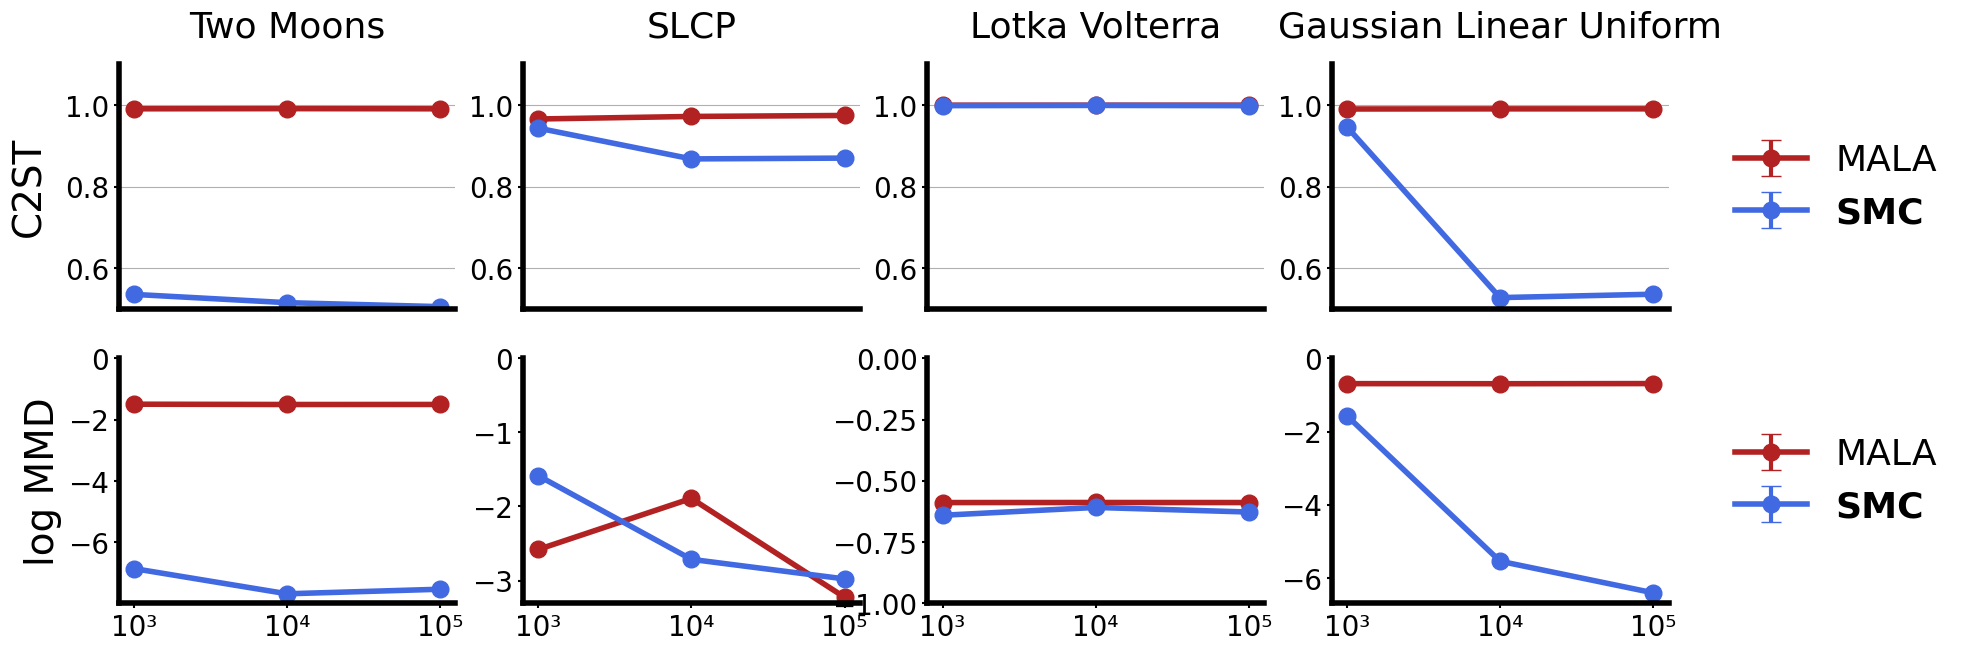

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt

pretty_names = {
    "two_moons": "Two Moons",
    "slcp": "SLCP",
    "gaussian_linear_uniform": "Gaussian Linear Uniform",
    "lotka_volterra": "Lotka Volterra"
}
metric = "C2ST"
limits_metric = {
    "MMD": (0, 1),
    "C2ST": (0.5, 1.1)
}

errorbar_kws = dict(
    linewidth=4,
    elinewidth=3,
    markersize=12,
    capsize=7, 
    marker="o"
)

fontsize=26
tk_fontsize=20

with mpl.rc_context(fname='.matplotlibrc'):
    mpl.rc('font',family='DejaVu Sans')
    mpl.rc("text", usetex=False)
    
    # ax.plot(
    #     "-+",
    # )
    tasks = ("two_moons", "slcp", "lotka_volterra", "gaussian_linear_uniform")
    f, axss = plt.subplots(ncols=len(tasks), nrows=2, figsize=(5 * len(tasks), 3.5 *2))
    
    axs = axss[0]
    metric="C2ST"
    for t_no, task in enumerate(tasks):
        ax = axs[t_no]
        ax.grid(axis="y")
        for axis in ['bottom','left']:
            ax.spines[axis].set_linewidth(4)
            
        ax.errorbar(
            ar.xs(task, level="task").xs("mala", level="sampler").groupby("num_simulations")[metric].mean().index,
            ar.xs(task, level="task").xs("mala", level="sampler").groupby("num_simulations")[metric].mean(),
            ar.xs(task, level="task").xs("mala", level="sampler").groupby("num_simulations")[metric].std(),
            label="MALA",
            color="firebrick",
            **errorbar_kws
        )
        ax.set_ylim(*limits_metric[metric])

        ax.errorbar(
            ar.xs(task, level="task").xs("smc", level="sampler").groupby("num_simulations")[metric].mean().index,
            ar.xs(task, level="task").xs("smc", level="sampler").groupby("num_simulations")[metric].mean(),
            ar.xs(task, level="task").xs("smc", level="sampler").groupby("num_simulations")[metric].std(),
            label="SMC",
            color="royalblue",
            **errorbar_kws
        )

        ax.set_title(pretty_names[task], fontsize=fontsize, pad=20)
        ax.tick_params(axis='both', labelsize=tk_fontsize)
        ax.get_xaxis().set_ticks([])

        
    l = axs[-1].legend(fontsize=fontsize, bbox_to_anchor=(1.1, 0.5), bbox_transform=axs[-1].transAxes, loc="center left")
    l.texts[1].set_weight("bold")
    
    axs = axss[1]
    metric ="MMD"
    import math
    for t_no, task in enumerate(tasks):
        ax = axs[t_no]
        for axis in ['bottom','left']:
            ax.spines[axis].set_linewidth(4)
            
        ax.errorbar(
            ar.xs(task, level="task").xs("mala", level="sampler").groupby("num_simulations")[metric].mean().index,
            ar.xs(task, level="task").xs("mala", level="sampler").groupby("num_simulations")[metric].mean().apply(math.log),
            ar.xs(task, level="task").xs("mala", level="sampler").groupby("num_simulations")[metric].std().apply(math.log),
            label="MALA",
            color="firebrick",
            **errorbar_kws
        )

        ax.errorbar(
            ar.xs(task, level="task").xs("smc", level="sampler").groupby("num_simulations")[metric].mean().index,
            ar.xs(task, level="task").xs("smc", level="sampler").groupby("num_simulations")[metric].mean().apply(math.log),
            ar.xs(task, level="task").xs("smc", level="sampler").groupby("num_simulations")[metric].std().apply(math.log),
            label="SMC",
            color="royalblue",
            **errorbar_kws
        )

        # ax.set_title(pretty_names[task], fontsize=fontsize, pad=20)
        ax.tick_params(axis='both', labelsize=tk_fontsize)
        
        ax.set_ylim(min(ax.get_ylim()[0], -1), 0)
        # ax.get_xaxis().set_ticks([])

        
    l = axs[-1].legend(fontsize=fontsize, bbox_to_anchor=(1.1, 0.5), bbox_transform=axs[-1].transAxes, loc="center left")
    l.texts[1].set_weight("bold")

axss[0][0].set_ylabel("C2ST", fontsize=28, labelpad=12)
axss[1][0].set_ylabel("log MMD", fontsize=28)

# f.savefig("figures/mala_vs_mc.png")

In [11]:
configs = (
    dict(ebm_model_type="joint_tilted",evaluate_posterior=True, num_posterior_samples=10000, sampler="smc", num_smc_steps=20),
    dict(ebm_model_type="joint_tilted",evaluate_posterior=True, num_posterior_samples=10000, sampler="mala", num_mala_steps=200),
)

In [12]:
import pandas as pd

dfs = []
for config in configs:
    df = r.fetch_evaluation_results(**config)
    dfs.append(df)
    
df = pd.concat(dfs)

In [13]:
# df2 = get_metadata(df)
df2 = df.groupby(["task","num_samples","sampler"]).mean().reset_index("num_samples")
num_simulations_str_map = {100000: "10⁵", 10000: "10⁴", 1000: "10³"}
df2['num_simulations'] = df2.num_samples.apply(lambda x: num_simulations_str_map[sum(x)])
df2 = df2.set_index("num_simulations", append=True)
df2 = df2.drop("num_samples", axis=1).rename(columns={"c2st": "C2ST", "mmd": "MMD"})

In [14]:
ar = df2

  xys = np.asarray(xys)


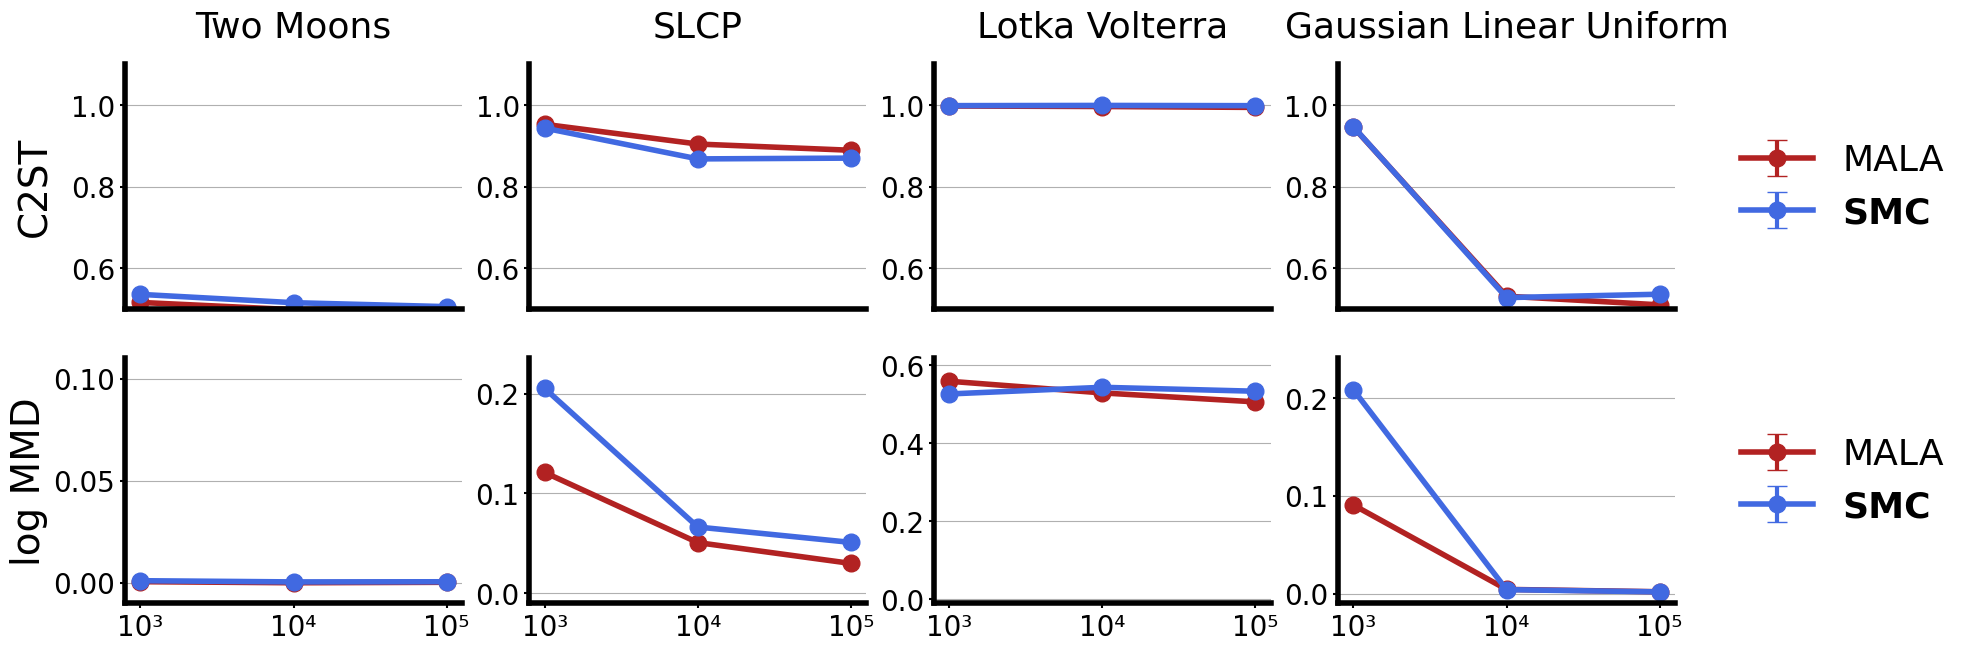

In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt

pretty_names = {
    "two_moons": "Two Moons",
    "slcp": "SLCP",
    "gaussian_linear_uniform": "Gaussian Linear Uniform",
    "lotka_volterra": "Lotka Volterra"
}
metric = "C2ST"
limits_metric = {
    "MMD": (0, 1),
    "C2ST": (0.5, 1.1)
}

errorbar_kws = dict(
    linewidth=4,
    elinewidth=3,
    markersize=12,
    capsize=7, 
    marker="o"
)

fontsize=26
tk_fontsize=20

with mpl.rc_context(fname='.matplotlibrc'):
    mpl.rc('font',family='DejaVu Sans')
    mpl.rc("text", usetex=False)
    
    # ax.plot(
    #     "-+",
    # )
    tasks = ("two_moons", "slcp", "lotka_volterra", "gaussian_linear_uniform")
    f, axss = plt.subplots(ncols=len(tasks), nrows=2, figsize=(5 * len(tasks), 3.5 *2))
    
    axs = axss[0]
    metric="C2ST"
    for t_no, task in enumerate(tasks):
        ax = axs[t_no]
        ax.grid(axis="y")
        for axis in ['bottom','left']:
            ax.spines[axis].set_linewidth(4)
            
        ax.errorbar(
            ar.xs(task, level="task").xs("mala", level="sampler").groupby("num_simulations")[metric].mean().index,
            ar.xs(task, level="task").xs("mala", level="sampler").groupby("num_simulations")[metric].mean(),
            ar.xs(task, level="task").xs("mala", level="sampler").groupby("num_simulations")[metric].std(),
            label="MALA",
            color="firebrick",
            **errorbar_kws
        )
        ax.set_ylim(*limits_metric[metric])

        ax.errorbar(
            ar.xs(task, level="task").xs("smc", level="sampler").groupby("num_simulations")[metric].mean().index,
            ar.xs(task, level="task").xs("smc", level="sampler").groupby("num_simulations")[metric].mean(),
            ar.xs(task, level="task").xs("smc", level="sampler").groupby("num_simulations")[metric].std(),
            label="SMC",
            color="royalblue",
            **errorbar_kws
        )

        ax.set_title(pretty_names[task], fontsize=fontsize, pad=20)
        ax.tick_params(axis='both', labelsize=tk_fontsize)
        ax.get_xaxis().set_ticks([])

        
    l = axs[-1].legend(fontsize=fontsize, bbox_to_anchor=(1.1, 0.5), bbox_transform=axs[-1].transAxes, loc="center left")
    l.texts[1].set_weight("bold")
    
    axs = axss[1]
    metric ="MMD"
    import math
    for t_no, task in enumerate(tasks):
        ax = axs[t_no]
        ax.grid(axis="y")
        for axis in ['bottom','left']:
            ax.spines[axis].set_linewidth(4)
            
        # ax.errorbar(
        #     ar.xs(task, level="task").xs("mala", level="sampler").groupby("num_simulations")[metric].mean().index,
        #     ar.xs(task, level="task").xs("mala", level="sampler").groupby("num_simulations")[metric].mean().apply(math.log),
        #     ar.xs(task, level="task").xs("mala", level="sampler").groupby("num_simulations")[metric].std().apply(math.log),
        #     label="MALA",
        #     color="firebrick",
        #     **errorbar_kws
        # )
        # ax.errorbar(
        #     ar.xs(task, level="task").xs("smc", level="sampler").groupby("num_simulations")[metric].mean().index,
        #     ar.xs(task, level="task").xs("smc", level="sampler").groupby("num_simulations")[metric].mean().apply(math.log),
        #     ar.xs(task, level="task").xs("smc", level="sampler").groupby("num_simulations")[metric].std().apply(math.log),
        #     label="SMC",
        #     color="royalblue",
        #     **errorbar_kws
        # )
        ax.errorbar(
            ar.xs(task, level="task").xs("mala", level="sampler").groupby("num_simulations")[metric].mean().index,
            ar.xs(task, level="task").xs("mala", level="sampler").groupby("num_simulations")[metric].mean(),
            ar.xs(task, level="task").xs("mala", level="sampler").groupby("num_simulations")[metric].std(),
            label="MALA",
            color="firebrick",
            **errorbar_kws
        )

        ax.errorbar(
            ar.xs(task, level="task").xs("smc", level="sampler").groupby("num_simulations")[metric].mean().index,
            ar.xs(task, level="task").xs("smc", level="sampler").groupby("num_simulations")[metric].mean(),
            ar.xs(task, level="task").xs("smc", level="sampler").groupby("num_simulations")[metric].std(),
            label="SMC",
            color="royalblue",
            **errorbar_kws
        )

        # ax.set_title(pretty_names[task], fontsize=fontsize, pad=20)
        ax.tick_params(axis='both', labelsize=tk_fontsize)
        
        ax.set_ylim(-0.01, max(ax.get_ylim()[1], 0.1) *  1.1)
        # ax.get_xaxis().set_ticks([])

        
    l = axs[-1].legend(fontsize=fontsize, bbox_to_anchor=(1.1, 0.5), bbox_transform=axs[-1].transAxes, loc="center left")
    l.texts[1].set_weight("bold")

axss[0][0].set_ylabel("C2ST", fontsize=28, labelpad=12)
axss[1][0].set_ylabel("log MMD", fontsize=28)

f.savefig("figures/mala_vs_smc_200v20.png", bbox_inches="tight")

In [16]:
configs = (
    dict(ebm_model_type="joint_tilted",evaluate_posterior=True, num_posterior_samples=10000, sampler="smc", num_smc_steps=5),
    dict(ebm_model_type="joint_tilted",evaluate_posterior=True, num_posterior_samples=10000, sampler="mala", num_mala_steps=30),
)

In [17]:
import pandas as pd

dfs = []
for config in configs:
    df = r.fetch_evaluation_results(**config)
    dfs.append(df)
    
df = pd.concat(dfs)

In [18]:
# df2 = get_metadata(df)
df2 = df.groupby(["task","num_samples","sampler"]).mean().reset_index("num_samples")
num_simulations_str_map = {100000: "10⁵", 10000: "10⁴", 1000: "10³"}
df2['num_simulations'] = df2.num_samples.apply(lambda x: num_simulations_str_map[sum(x)])
df2 = df2.set_index("num_simulations", append=True)
df2 = df2.drop("num_samples", axis=1).rename(columns={"c2st": "C2ST", "mmd": "MMD"})

In [19]:
ar = df2

  xys = np.asarray(xys)


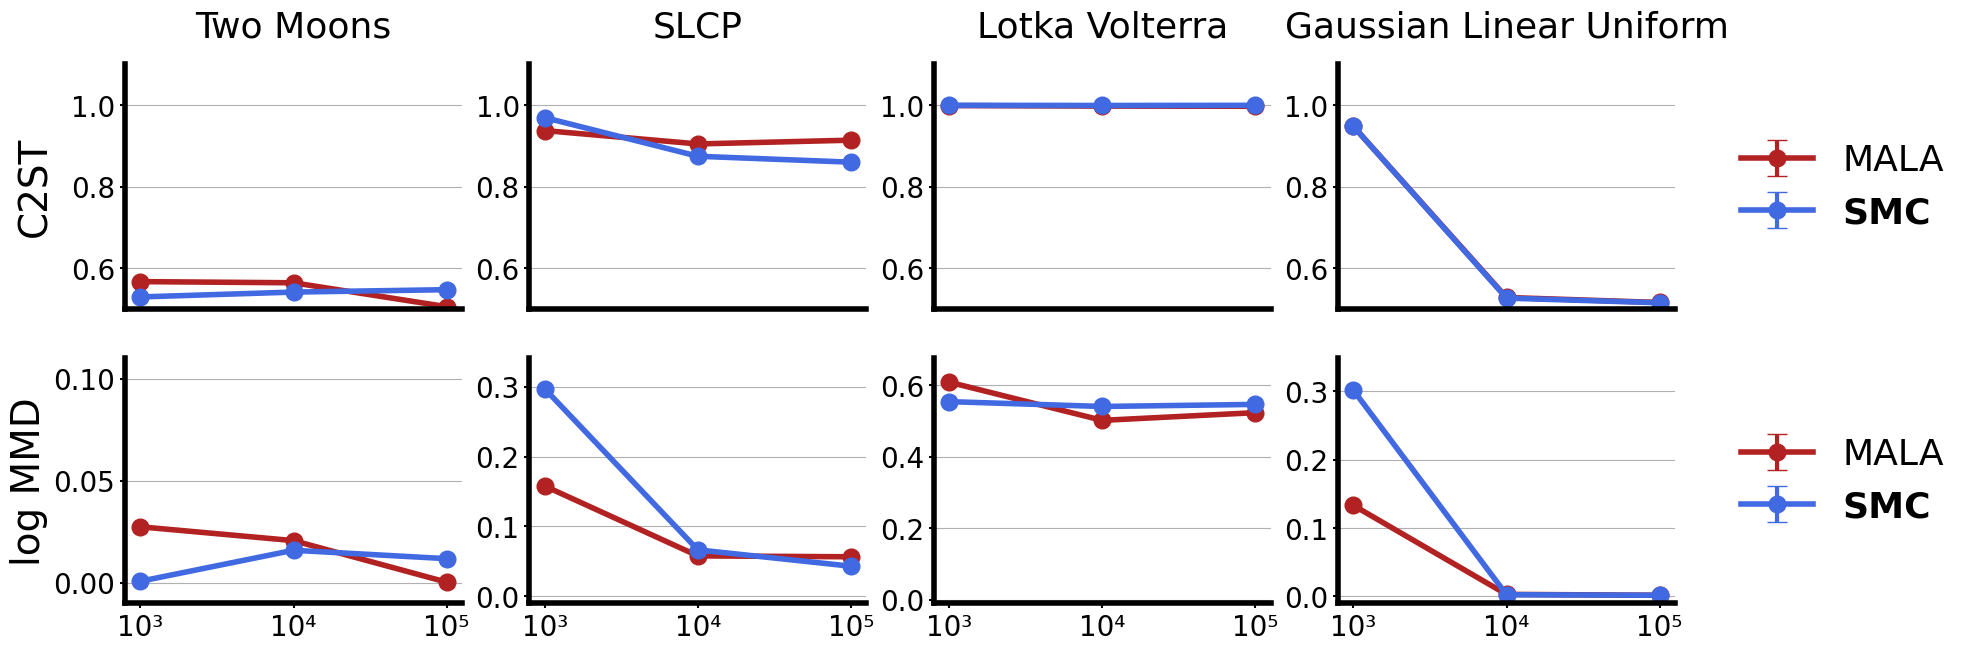

In [20]:
import matplotlib as mpl
import matplotlib.pyplot as plt

pretty_names = {
    "two_moons": "Two Moons",
    "slcp": "SLCP",
    "gaussian_linear_uniform": "Gaussian Linear Uniform",
    "lotka_volterra": "Lotka Volterra"
}
metric = "C2ST"
limits_metric = {
    "MMD": (0, 1),
    "C2ST": (0.5, 1.1)
}

errorbar_kws = dict(
    linewidth=4,
    elinewidth=3,
    markersize=12,
    capsize=7, 
    marker="o"
)

fontsize=26
tk_fontsize=20

with mpl.rc_context(fname='.matplotlibrc'):
    mpl.rc('font',family='DejaVu Sans')
    mpl.rc("text", usetex=False)
    
    # ax.plot(
    #     "-+",
    # )
    tasks = ("two_moons", "slcp", "lotka_volterra", "gaussian_linear_uniform")
    f, axss = plt.subplots(ncols=len(tasks), nrows=2, figsize=(5 * len(tasks), 3.5 *2))
    
    axs = axss[0]
    metric="C2ST"
    for t_no, task in enumerate(tasks):
        ax = axs[t_no]
        ax.grid(axis="y")
        for axis in ['bottom','left']:
            ax.spines[axis].set_linewidth(4)
            
        ax.errorbar(
            ar.xs(task, level="task").xs("mala", level="sampler").groupby("num_simulations")[metric].mean().index,
            ar.xs(task, level="task").xs("mala", level="sampler").groupby("num_simulations")[metric].mean(),
            ar.xs(task, level="task").xs("mala", level="sampler").groupby("num_simulations")[metric].std(),
            label="MALA",
            color="firebrick",
            **errorbar_kws
        )
        ax.set_ylim(*limits_metric[metric])

        ax.errorbar(
            ar.xs(task, level="task").xs("smc", level="sampler").groupby("num_simulations")[metric].mean().index,
            ar.xs(task, level="task").xs("smc", level="sampler").groupby("num_simulations")[metric].mean(),
            ar.xs(task, level="task").xs("smc", level="sampler").groupby("num_simulations")[metric].std(),
            label="SMC",
            color="royalblue",
            **errorbar_kws
        )

        ax.set_title(pretty_names[task], fontsize=fontsize, pad=20)
        ax.tick_params(axis='both', labelsize=tk_fontsize)
        ax.get_xaxis().set_ticks([])

        
    l = axs[-1].legend(fontsize=fontsize, bbox_to_anchor=(1.1, 0.5), bbox_transform=axs[-1].transAxes, loc="center left")
    l.texts[1].set_weight("bold")
    
    axs = axss[1]
    metric ="MMD"
    import math
    for t_no, task in enumerate(tasks):
        ax = axs[t_no]
        ax.grid(axis="y")
        for axis in ['bottom','left']:
            ax.spines[axis].set_linewidth(4)
            
        # ax.errorbar(
        #     ar.xs(task, level="task").xs("mala", level="sampler").groupby("num_simulations")[metric].mean().index,
        #     ar.xs(task, level="task").xs("mala", level="sampler").groupby("num_simulations")[metric].mean().apply(math.log),
        #     ar.xs(task, level="task").xs("mala", level="sampler").groupby("num_simulations")[metric].std().apply(math.log),
        #     label="MALA",
        #     color="firebrick",
        #     **errorbar_kws
        # )
        # ax.errorbar(
        #     ar.xs(task, level="task").xs("smc", level="sampler").groupby("num_simulations")[metric].mean().index,
        #     ar.xs(task, level="task").xs("smc", level="sampler").groupby("num_simulations")[metric].mean().apply(math.log),
        #     ar.xs(task, level="task").xs("smc", level="sampler").groupby("num_simulations")[metric].std().apply(math.log),
        #     label="SMC",
        #     color="royalblue",
        #     **errorbar_kws
        # )
        ax.errorbar(
            ar.xs(task, level="task").xs("mala", level="sampler").groupby("num_simulations")[metric].mean().index,
            ar.xs(task, level="task").xs("mala", level="sampler").groupby("num_simulations")[metric].mean(),
            ar.xs(task, level="task").xs("mala", level="sampler").groupby("num_simulations")[metric].std(),
            label="MALA",
            color="firebrick",
            **errorbar_kws
        )

        ax.errorbar(
            ar.xs(task, level="task").xs("smc", level="sampler").groupby("num_simulations")[metric].mean().index,
            ar.xs(task, level="task").xs("smc", level="sampler").groupby("num_simulations")[metric].mean(),
            ar.xs(task, level="task").xs("smc", level="sampler").groupby("num_simulations")[metric].std(),
            label="SMC",
            color="royalblue",
            **errorbar_kws
        )

        # ax.set_title(pretty_names[task], fontsize=fontsize, pad=20)
        ax.tick_params(axis='both', labelsize=tk_fontsize)
        
        ax.set_ylim(-0.01, max(ax.get_ylim()[1], 0.1) *  1.1)
        # ax.get_xaxis().set_ticks([])

        
    l = axs[-1].legend(fontsize=fontsize, bbox_to_anchor=(1.1, 0.5), bbox_transform=axs[-1].transAxes, loc="center left")
    l.texts[1].set_weight("bold")

axss[0][0].set_ylabel("C2ST", fontsize=28, labelpad=12)
axss[1][0].set_ylabel("log MMD", fontsize=28)

f.savefig("figures/mala_vs_smc_30v5.png", bbox_inches="tight")